In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
liste_nb_part = [30000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000, 260000, 280000, 300000, 320000, 340000, 360000]
liste_E = [500, 1500, 3000]
liste_nu = [0.35, 0.40, 0.45]
densite = np.zeros ((len(liste_nb_part), len(liste_E), len(liste_nu)))
hauteur = np.zeros ((len(liste_nb_part), len(liste_E), len(liste_nu)))
largeur = np.zeros ((len(liste_nb_part), len(liste_E), len(liste_nu)))
iterations = np.zeros ((len(liste_nb_part), len(liste_E), len(liste_nu)), dtype=int)

In [3]:
for i, nb_part in enumerate(liste_nb_part):
    for j,E in enumerate(liste_E):
        for k,nu in enumerate(liste_nu):
            nom_fichier = "particules" + str(nb_part) + "E" + str(E) + "nu" + "{:.2f}".format(nu) + ".res"
            f = open(nom_fichier, "r")
            #print(i,j,k,nom_fichier)
            lu = f.readline()[:-1]
            #print(lu)
            liste_lue = lu.split(" ")
            #print(liste_lue)
            densite[i,j,k] = float(liste_lue [0])
            hauteur[i,j,k] = float(liste_lue [1])
            largeur[i,j,k] = float(liste_lue [2])
            iterations[i,j,k] = int(liste_lue [3])            

In [4]:
#densite

In [25]:
densite_min = np.zeros((len(liste_E), len(liste_nu)))
indice_min = np.zeros((len(liste_E), len(liste_nu)),dtype=int)
iterations_min = np.zeros((len(liste_E), len(liste_nu)), dtype=int)
indice_iterations = np.zeros((len(liste_E), len(liste_nu)), dtype=int)
for j,E in enumerate(liste_E):
    for k,nu in enumerate(liste_nu):
        for i in range(len(densite[:,j,k])):
            if densite[i,j,k] > 0.95*densite[-1,j,k]:
                densite_min[j,k] = densite[i,j,k]
                iterations_min[j,k] = iterations[i,j,k]
                indice_iterations[j,k] = i
                indice_min[j,k] = i
                break

In [26]:
len(liste_nb_part)

18

In [27]:
indice_min

array([[17, 17, 17],
       [17, 17, 17],
       [17, 17, 17]])

In [28]:
densite_min

array([[720000., 720000., 720000.],
       [720000., 720000., 720000.],
       [720000., 720000., 720000.]])

In [9]:
type(iterations[0,0,0])

numpy.int64

In [10]:
indice_iterations

array([[17, 17, 17],
       [17, 17, 17],
       [17, 17, 17]])

In [11]:
iterations_min

array([[36300, 31440, 23660],
       [20960, 18180, 13680],
       [14840, 12880,  9700]])

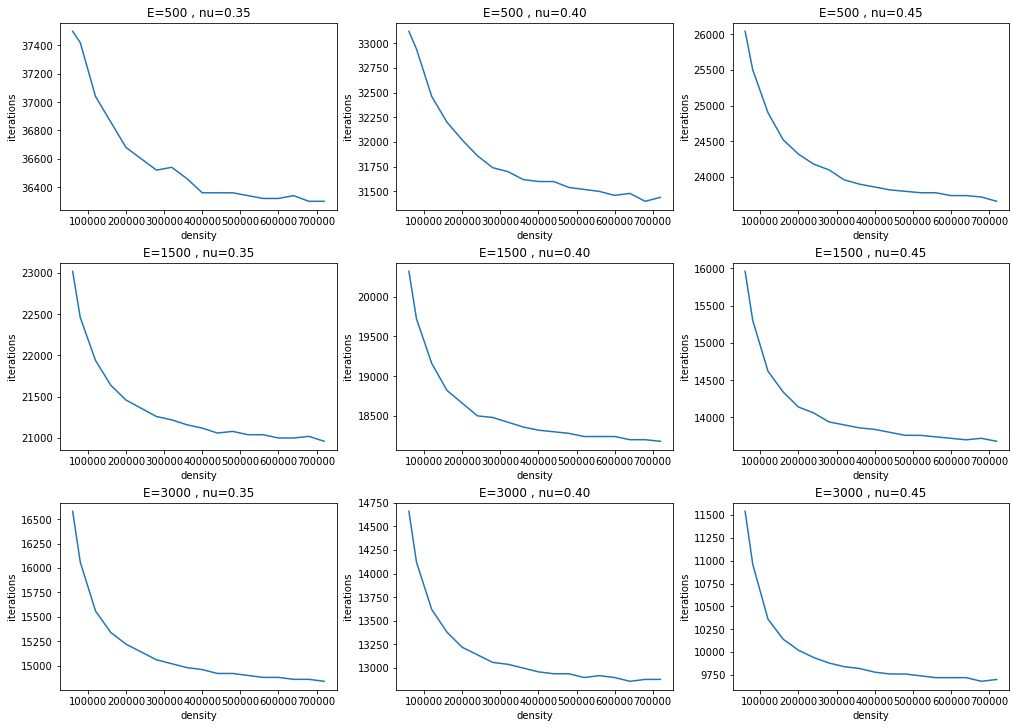

In [12]:
fig, ax = plt.subplots(3,3,figsize=(14, 10), layout='constrained')
for i,E in enumerate(liste_E):
    for j,nu in enumerate(liste_nu):
        #ax[i,j].plot(densite[:,i,j], hauteur[:,i,j])
        ax[i,j].plot(densite[:,i,j], iterations[:,i,j])
        
        ax[i,j].set_title("E=" + str(E) + " , " + "nu=" + "{:.2f}".format(nu))
        ax[i,j].set_xlabel('density') 
        ax[i,j].set_ylabel('iterations')

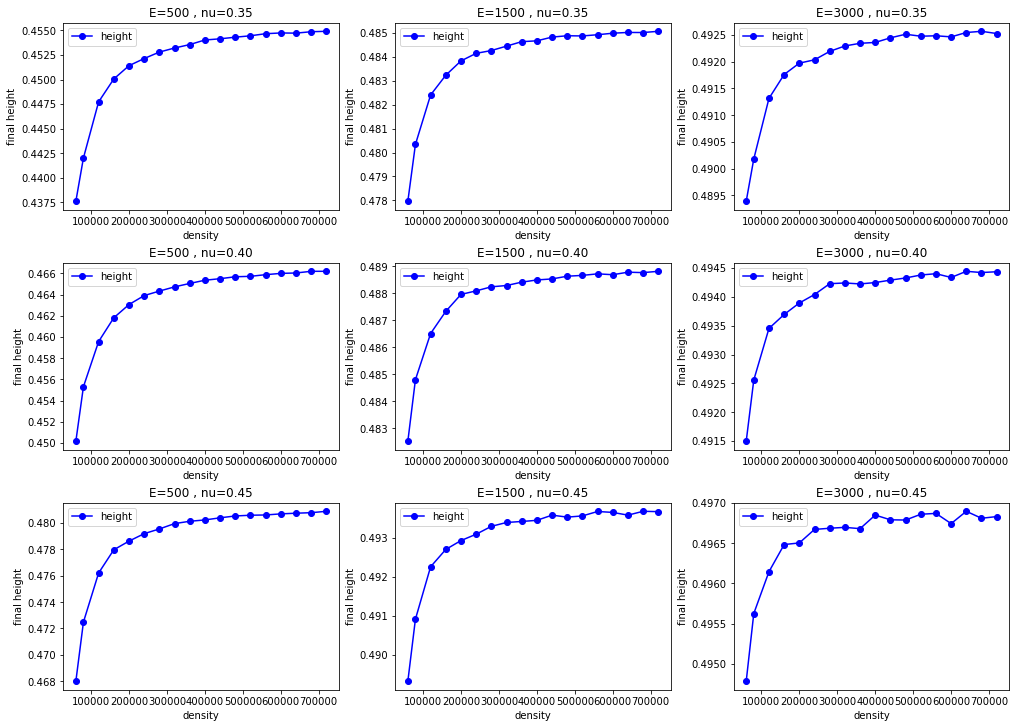

In [13]:
fig, ax = plt.subplots(3,3,figsize=(14, 10), layout='constrained')
for i,nu in enumerate(liste_nu):
    for j,E in enumerate(liste_E):
        ax[i,j].plot(densite[:,j,i], hauteur[:,j,i], 'o', linestyle='-', color = "blue", label='height')
        #ax[i,j].set_ylim([0.43, 0.5])
        #ax[i,j].plot(densite[:,j,i], largeur[:,j,i], 'o', linestyle='-', color = "red")
#         ax1 = ax[i,j].twinx()
#         ax1.plot(densite[:,j,i], largeur[:,j,i], 'o', linestyle='-', color = "red")
        ax[i,j].set_title("E=" + str(E) + " , " + "nu=" + "{:.2f}".format(nu))
        ax[i,j].set_xlabel('density') 
        ax[i,j].set_ylabel('final height')
        ax[i,j].legend()
        
#         secax = ax[i,j].twinx()
#         secax.set_ylabel('final width')
#         y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#         secax.yaxis.set_major_formatter(y_formatter)
#         secax.plot(densite[:,j,i], largeur[:,j,i], 'o', linestyle='-', color = "red", label='width')
#         secax.legend(loc='lower right')


In [14]:
data = iterations_min.T

In [15]:
data

array([[36300, 20960, 14840],
       [31440, 18180, 12880],
       [23660, 13680,  9700]])

Text(0.5, 1.0, 'Number of iterations')

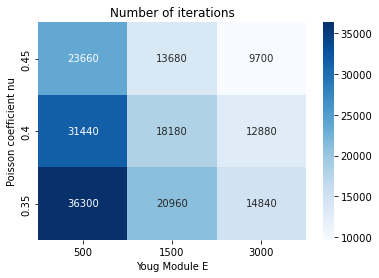

In [16]:
# labels= np.ndarray((len(liste_E), len(liste_nu)) , dtype=str)
# for j,E in enumerate(liste_E):
#     for k,nu in enumerate(liste_nu):
#         labels[j,k] = str(E)

#labels =  np.array([['1','2','3'],['4','5','6'],['7','8','9']])

fig, ax = plt.subplots()
ax = sns.heatmap(data, annot = True, fmt = '',cmap="Blues" )
ax.invert_yaxis()
ax.set_xticklabels(liste_E)
ax.set_yticklabels(liste_nu)
ax.set_xlabel('Youg Module E')
ax.set_ylabel('Poisson coefficient nu')
ax.set_title('Number of iterations')

In [144]:
labels[0,0]

''